# Insaid Term 3- Candy ML1 Project - Sudha Udayakumar

# Summarization of Learning:
    In Insaid we learnt about basics of Python and EDA in Term 1 & 2. In Term 3 we had learnt about Machine Learning- Supervised Learning. In this project we are going to combine the all the 3 Terms and do a project using Machine Learning. 
    
  9 steps of EDA
    
1.	Define Problem
2.	Choose right tools
3.	Collection of data
4.  Pre-profile
5.	Pre processing of data (Clean, remove unnecessary, add relevant data)
6.  Post-profile
7.	Ask right Questions 
8.	Conclusion or Summarization
9.	Actionable Insights (low hanging fruits)

    
    7 Stages of ML
    
    1. Data Collection
    2. Data Preparation
    3. Choose Model
    4. Train Model
    5. Evaluate Model
    6. Improve Model
    7. Predict Model
    
    

# Introduction (Define Problem)

### Problem Statement (Given)


Each row in the dataset corresponds to one type of Halloween candy.
Participants are shown different candies two at time and were asked which candy do they prefer.
After aggregating all the votes, each candy is given winpercent.

You can visit the voting site to get an idea. 
walthickey.com/2017/10/18/whats-the-best-halloween-candy/

winpercent is the target variable.

### Problem Statement (Summarized)

# Choose Right Tools

## Importing and Installing the packages

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
# To install pandas profiling please run this command.
#while re-running the notebook we dont want the pip command, so commenting it out
#!pip install pandas-profiling --upgrade
#!pip uninstall !pip uninstall pandas_profiling
#!pip install pandas_profiling[notebook,html]

In [3]:
from pandas_profiling import ProfileReport

### Handling warnings


In [4]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

# Loading Data

In [5]:
 # Importing training dataset using pd.read_csv from github. Not saving the file locally
candy_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv") 

# to have a quick glance of data
candy_df.head()


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,46.12
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34


<span style='background:yellow'> Observation: The table is loading correctly</span>

### Description of Data

| Columns | Why, What, Who about the data     |
|---------|-----------------|
|   competitorname  |Who is the seller of the candy?|
|chocolate|Does it contain chocolate?|
| fruity   |Is it fruit flavored?|
|caramel    |Is there caramel in the candy?|
|peanutyalmondy|Does it contain peanuts, peanut butter or almonds?|
|nougat   |Does it contain nougat?|
|crispedricewafer     |Does it contain crisped rice, wafers, or a cookie component?|
|hard       |Is it a hard candy?|
|bar|Is it a candy bar?|
|pluribus|Is it one of many candies in a bag or box?|
|sugarpercent|The percentile of sugar it falls under within the data set|
|pricepercent |The unit price percentile compared to the rest of the set|
|winpercent|The overall win percentage according to 269,000 matchups|

<span style='background:yellow'>Observation: This is taken from the Problem statement given</span>

In [6]:
#to identify null, missing data and the type of Data
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


<span style='background:yellow'>  Observation:There are 85 rows, 13 columns  </span>
    

    **No Null data (non-null)**

    **No missing data (all columns have 85 values)**

    **As expected only the competitor name is an object type**

    **All types of candy are integer and remaing 3 float data**
    


In [7]:
#listing the column names, so it is easy to copy paste later during Train/test data
candy_df.columns


Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [8]:
# to find the shape of the data, though seen in the .info() , double checking here
candy_df.shape

(85, 13)

<span style='background:yellow'> Observation:As seen above in .info() we have 85 rows and 13 columns </span>

In [9]:
# to check for the null values. Already checked in .info(), double checking here
candy_df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

<span style='background:yellow'> Observation: There is no null data </span>

In [10]:
# to check the number of unique value in each columns. Just to confirm if there only 2 in the candy columns
candy_df.nunique()

competitorname      85
chocolate            2
fruity               2
caramel              2
peanutyalmondy       2
nougat               2
crispedricewafer     2
hard                 2
bar                  2
pluribus             2
sugarpercent        34
pricepercent        29
winpercent          85
dtype: int64

<span style='background:yellow'> Observation: The 9 candy columns have 2 unique values </span>

In [11]:

#to check the statistical data like count,mean, IQR
candy_df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,0.44,0.45,0.16,0.16,0.08,0.08,0.18,0.25,0.52,0.48,0.47,50.32
std,0.50,0.50,0.37,0.37,0.28,0.28,0.38,0.43,0.50,0.28,0.29,14.71
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,22.45
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.26,39.14
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.47,0.47,47.83
75%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.73,0.65,59.86
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,84.18


### Summary Of the Data



# Pre-Profiling of data
Let us pre-profile the data to analyze more 

1.	Checking for duplicates
2.	Checking for missing value
3.	Checking for Null Values
4.	Binning the data
5.	Outliers


In [12]:
# we pip installed pandas_profiling while choosing the right tools. Here we are importing pandas_profiling
import pandas_profiling

In [13]:
#Pandas Profiling report, saved to an external html file 
#Since this is pre-processing the data, we have named the html file similar to it
profile = pandas_profiling.ProfileReport(candy_df)
profile.to_file(output_file='candy_project_profiling_before_processing.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# To output the pandas profiling report on the notebook.

# candy_df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

<span style='color:Blue'> 
    Observation:
    After analysing the pre-profiling report and our intial data processing, we see there are
    
    1. No Missing Value
    2. No Null Values
    3. No Outliers
    
     Since there is no modification needed to the Data, we can directly go to EDA
    
 </span>
    
    

# EDA (Exploratory Data Analysis)

**Exploratory Data Analysis** is majorly performed using the following methods and to ask the right questions
1.	**Univariate visualization/analysis** — provides summary statistics for each field in the raw data set. 
2.	**Bivariate visualization/analysis** — is performed to find the relationship between each variable in the dataset and the target variable of interest. 
3.	Similarly, we can also do **Multivariate or multithemed analysis**.
4.	**Macro to Micro analysis** : A micro perspective focuses on the individual level, while a macro perspective focuses more broadly 


## Univariate Analysis

**Let us analyse and see the % each type of candy is available**

In [15]:
candy_df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [16]:
candy_types=['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']

0    48
1    37
Name: chocolate, dtype: int64

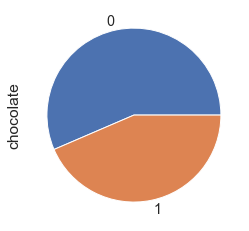

In [17]:
candy_df["chocolate"].value_counts().plot.pie()
candy_df["chocolate"].value_counts()

0    47
1    38
Name: fruity, dtype: int64

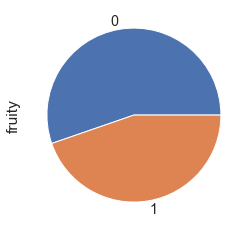

In [18]:
candy_df["fruity"].value_counts().plot.pie()
candy_df["fruity"].value_counts()

0    71
1    14
Name: caramel, dtype: int64

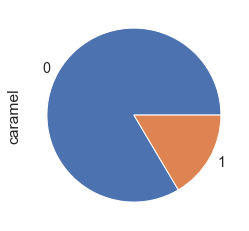

In [19]:
candy_df["caramel"].value_counts().plot.pie()
candy_df["caramel"].value_counts()

0    71
1    14
Name: peanutyalmondy, dtype: int64

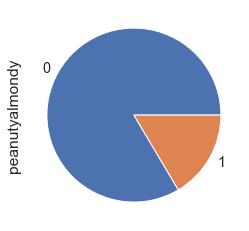

In [20]:
candy_df["peanutyalmondy"].value_counts().plot.pie()
candy_df["peanutyalmondy"].value_counts()

0    78
1     7
Name: nougat, dtype: int64

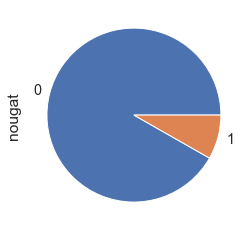

In [21]:
candy_df["nougat"].value_counts().plot.pie()
candy_df["nougat"].value_counts()

0    78
1     7
Name: crispedricewafer, dtype: int64

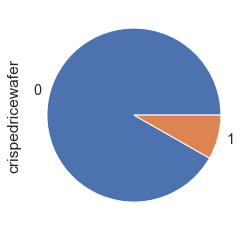

In [22]:
candy_df["crispedricewafer"].value_counts().plot.pie()
candy_df["crispedricewafer"].value_counts()

0    70
1    15
Name: hard, dtype: int64

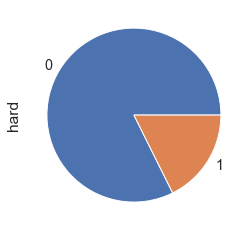

In [23]:
candy_df["hard"].value_counts().plot.pie()
candy_df["hard"].value_counts()

0    64
1    21
Name: bar, dtype: int64

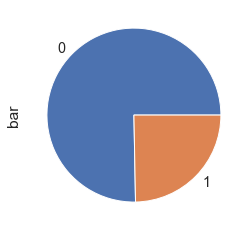

In [24]:
candy_df["bar"].value_counts().plot.pie()
candy_df["bar"].value_counts()

1    44
0    41
Name: pluribus, dtype: int64

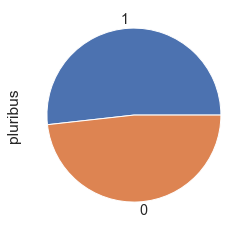

In [25]:
candy_df["pluribus"].value_counts().plot.pie()
candy_df["pluribus"].value_counts()

## Bivariate Analysis

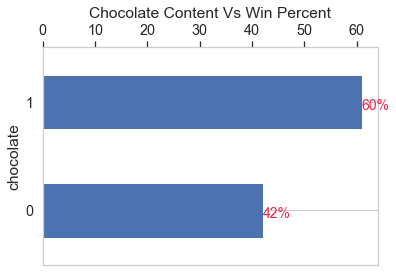

In [26]:

axes = candy_df['winpercent'].groupby(by=candy_df['chocolate']).mean().plot(kind='barh')
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width()))+'%', fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.title('Chocolate Content Vs Win Percent')
plt.show()

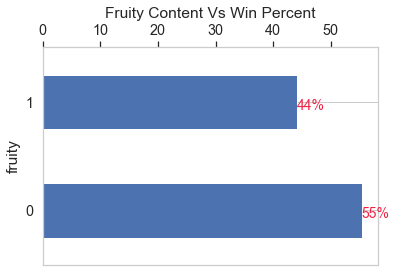

In [27]:
axes = candy_df['winpercent'].groupby(by=candy_df['fruity']).mean().plot(kind='barh')
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width()))+'%', fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.title('Fruity Content Vs Win Percent')
plt.show()

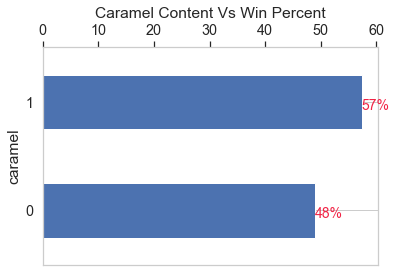

In [28]:
axes = candy_df['winpercent'].groupby(by=candy_df['caramel']).mean().plot(kind='barh')
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width()))+'%', fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.title('Caramel Content Vs Win Percent')
plt.show()

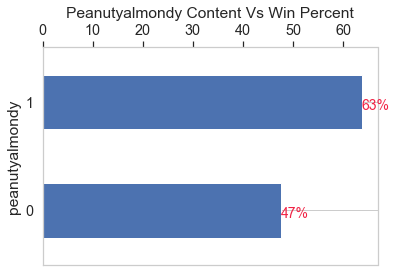

In [29]:
axes = candy_df['winpercent'].groupby(by=candy_df['peanutyalmondy']).mean().plot(kind='barh')
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width()))+'%', fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.title('Peanutyalmondy Content Vs Win Percent')
plt.show()

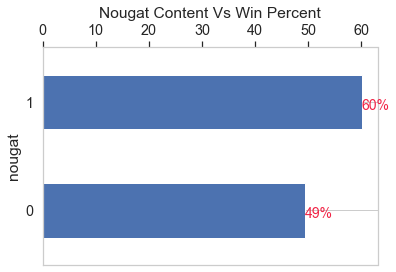

In [30]:
axes = candy_df['winpercent'].groupby(by=candy_df['nougat']).mean().plot(kind='barh')
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width()))+'%', fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.title('Nougat Content Vs Win Percent')
plt.show()

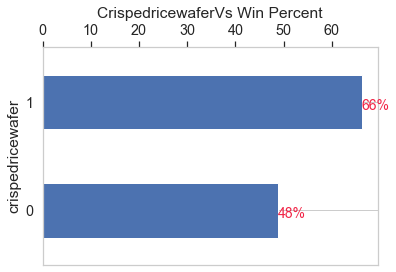

In [31]:
axes = candy_df['winpercent'].groupby(by=candy_df['crispedricewafer']).mean().plot(kind='barh')
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width()))+'%', fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.title('CrispedricewaferVs Win Percent')
plt.show()

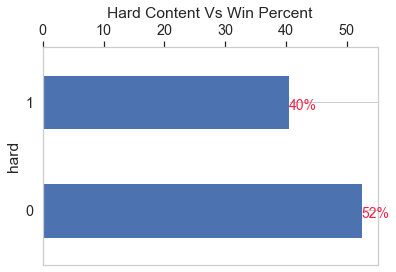

In [32]:
axes = candy_df['winpercent'].groupby(by=candy_df['hard']).mean().plot(kind='barh')
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width()))+'%', fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.title('Hard Content Vs Win Percent')
plt.show()

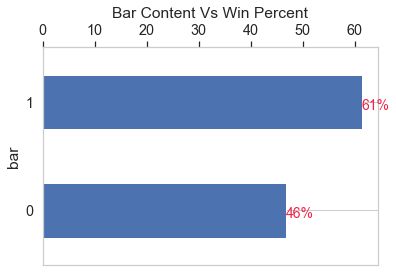

In [33]:
axes = candy_df['winpercent'].groupby(by=candy_df['bar']).mean().plot(kind='barh')
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width()))+'%', fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.title('Bar Content Vs Win Percent')
plt.show()

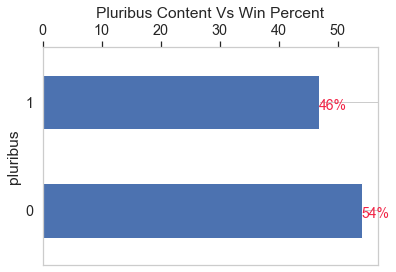

In [34]:
axes = candy_df['winpercent'].groupby(by=candy_df['pluribus']).mean().plot(kind='barh')
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width()))+'%', fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.title('Pluribus Content Vs Win Percent')
plt.show()

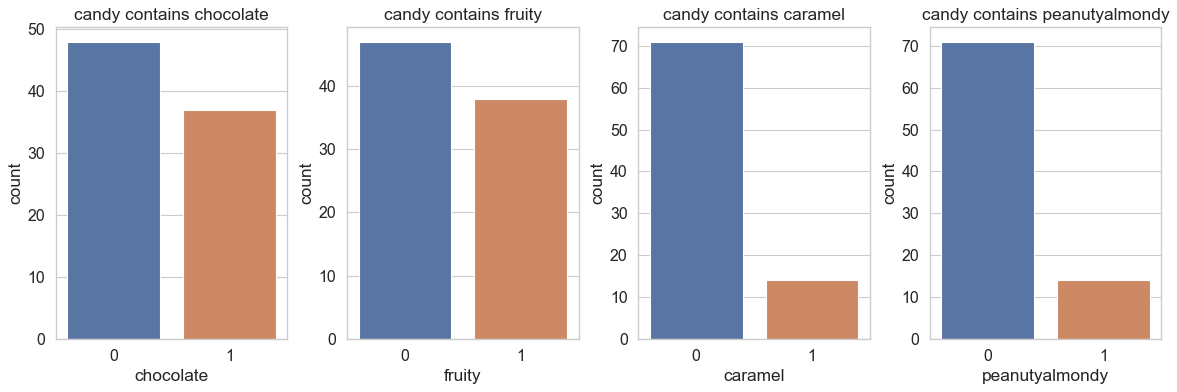

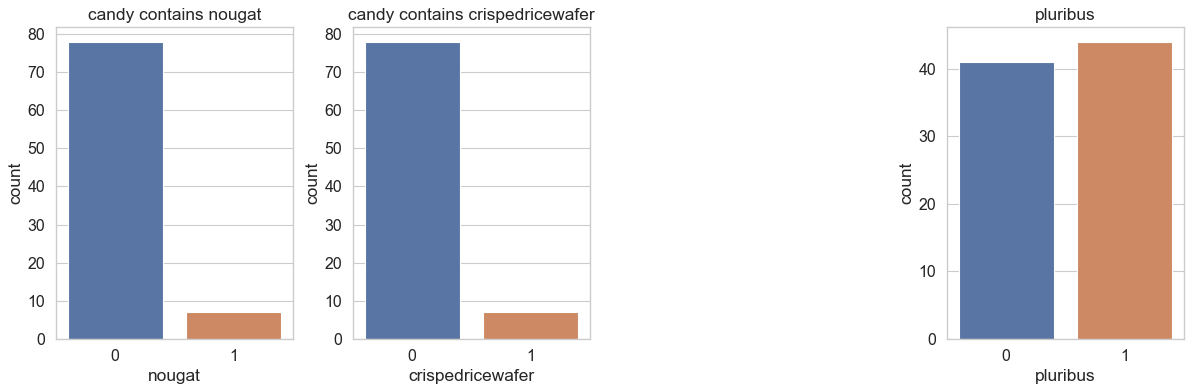

In [36]:
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,4,1)
sns.countplot(x=candy_df['chocolate'])
plt.title("candy contains chocolate")

plt.subplot(1,4,2)
sns.countplot(x=candy_df['fruity'])

plt.title("candy contains fruity")

plt.subplot(1,4,3)
sns.countplot(x=candy_df['caramel'])
plt.title("candy contains caramel")


plt.subplot(1,4,4)
sns.countplot(x=candy_df['peanutyalmondy'])
plt.title("candy contains peanutyalmondy")
#ax.set_yscale('log')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,4,1)
sns.countplot(x=candy_df['nougat'])
plt.title("candy contains nougat")

plt.subplot(1,4,2)
sns.countplot(x=candy_df['crispedricewafer'])

plt.title("candy contains crispedricewafer")


plt.subplot(1,4,4)
sns.countplot(x=candy_df['pluribus'])
plt.title("pluribus")
#ax.set_yscale('log')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'type of candy')

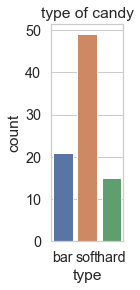

In [37]:
def map_type(x,y):
    if x == 1 and y==0:
        return("hard")
    elif x==0 and y==1:
        return ("bar")
    elif x==0 and y==0:
        return("soft")
    elif x==1 and y==1:
        return("soft")

candy_df['type'] = candy_df[['hard','bar']].apply(lambda x: map_type(x['hard'],x['bar']) , axis=1)


plt.subplot(1,4,3)
sns.countplot(x=candy_df['type'])
plt.title("type of candy")

<span style='background:yellow'>  Observation: maximum candies are soft type and more candies are sold in box rather than single </span>

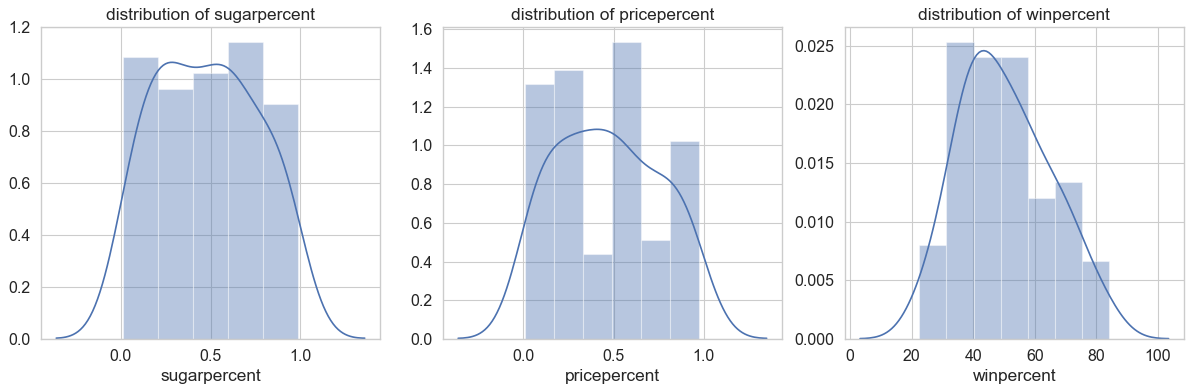

In [38]:
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,3,1)
sns.distplot(candy_df['sugarpercent'])
plt.title("distribution of sugarpercent")

plt.subplot(1,3,2)
sns.distplot(candy_df['pricepercent'])
plt.title("distribution of pricepercent")




plt.subplot(1,3,3)
sns.distplot(candy_df['winpercent'])
plt.title("distribution of winpercent")
#ax.set_yscale('log')
plt.tight_layout()
plt.show()

<span style='background:yellow'>  Observation: All 3 are normally distributed - Sugarpercent, Price Percent & Winpercent </span>

In [39]:
## creating a feature that tells us one what are the various combinations each candy has
candy_df['combo'] = candy_df['chocolate']+candy_df['fruity']+candy_df['caramel']+candy_df['peanutyalmondy']+candy_df['nougat']+candy_df['crispedricewafer']

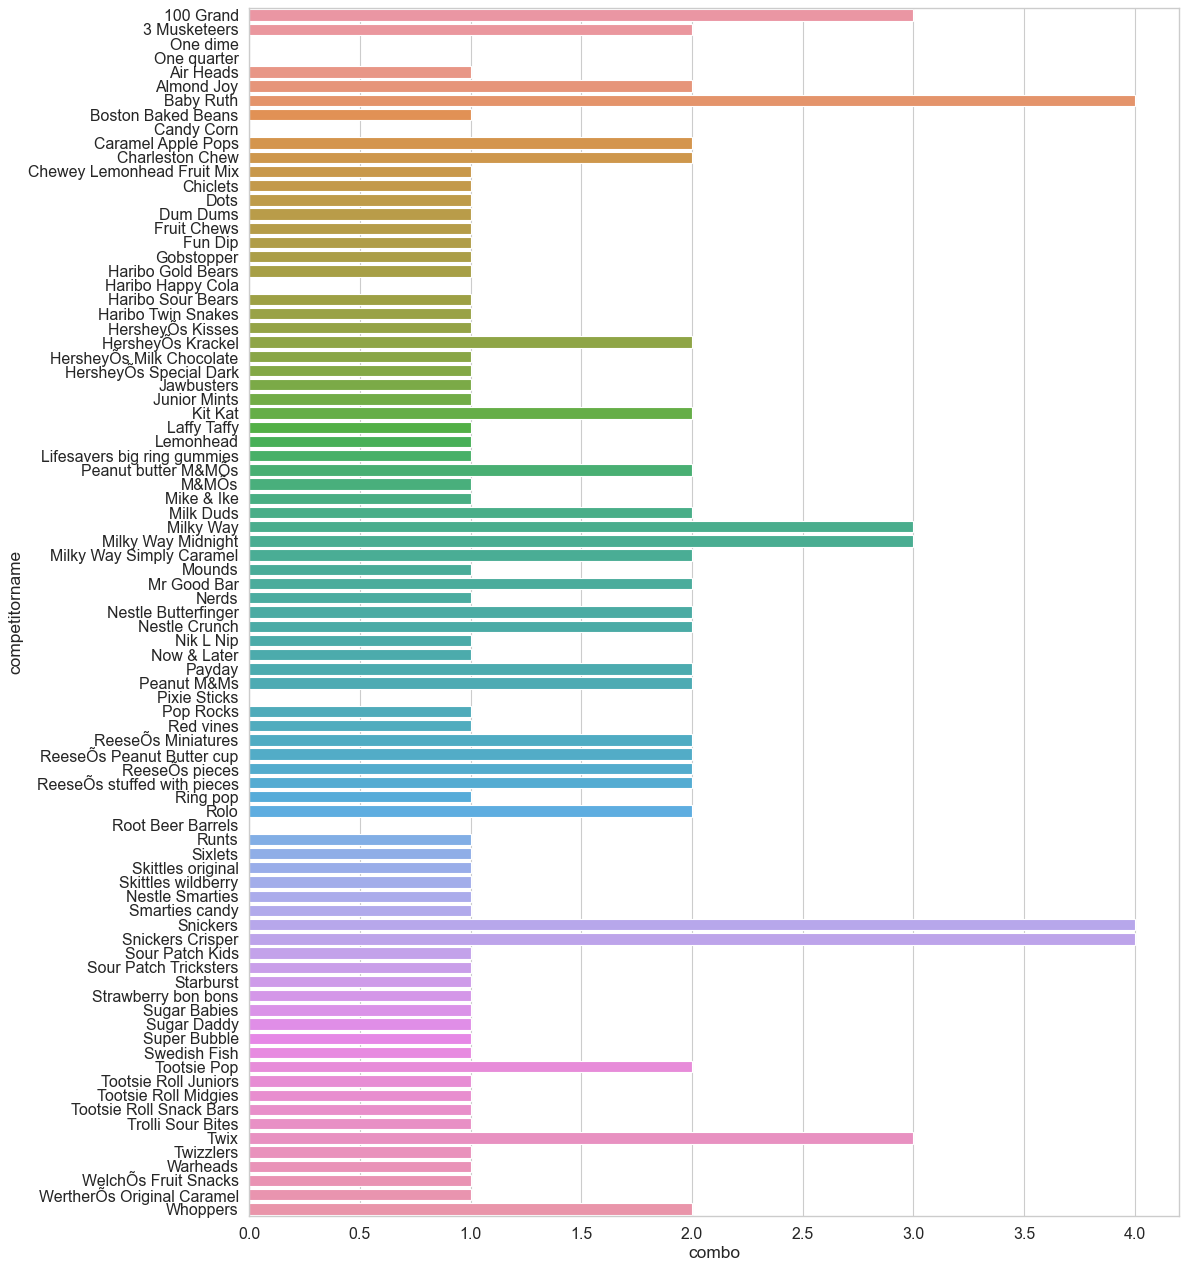

In [40]:
plt.figure(figsize=(15,20), dpi=80)
#plt.subplot(1,4,1)

sns.barplot(x="combo",y="competitorname",data=candy_df)
plt.show()

<span style='background:yellow'>  Observation: Snickers usually contain chocolate, caramel, nuts etc. so it shows in the data that snickers, snickers cripser and baby ruth has lots of features and flavors </span>

## Most & Least Preferred Candies

In [41]:
#Let us sort the table with the candies based on "Winpercent" and display the top 10
Preferred_candy=candy_df.sort_values(by="winpercent", ascending = False)
Preferred_candy.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,type,combo
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.65,84.18,soft,2
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,81.87,soft,2
79,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,81.64,bar,3
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.31,0.51,76.77,bar,2
64,Snickers,1,0,1,1,1,0,0,1,0,0.55,0.65,76.67,bar,4
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.41,0.65,73.43,soft,2
36,Milky Way,1,0,1,0,1,0,0,1,0,0.60,0.65,73.10,bar,3
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,72.89,soft,2
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.82,0.65,71.47,soft,2
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.60,0.77,70.74,bar,2


<span style='background:yellow'>  Observation: All the top 10 candies have chocolate in them </span>

In [42]:
#to see the least preferred candies, we need to just see the bottom of the table using .tail()

Preferred_candy.tail(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,type,combo
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.47,0.47,34.16,soft,0
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.96,0.77,33.44,soft,1
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26,soft,0
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.42,0.32,32.23,soft,1
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,29.70,hard,0
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.09,0.51,28.13,hard,1
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.16,0.12,27.30,soft,1
12,Chiclets,0,1,0,0,0,0,0,0,1,0.05,0.32,24.52,soft,1
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.31,0.51,23.42,soft,1
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.20,0.98,22.45,soft,1


<span style='background:yellow'>  Observation: All the least preferred 10 candies dont have chocolate in them </span>

### Visual Form (Top (5) and Least Preferred (5) Candies)

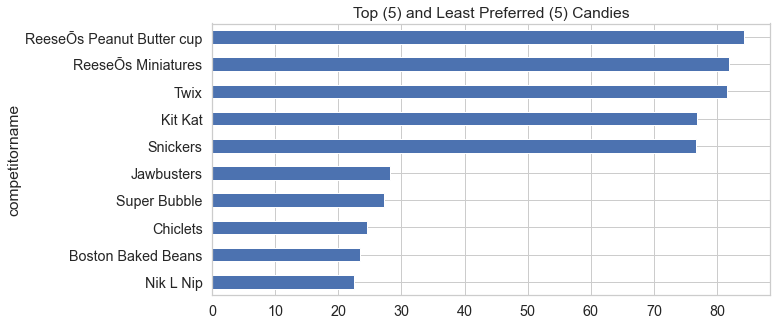

In [43]:
Preferred = candy_df[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([Preferred.head(5),Preferred.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Top (5) and Least Preferred (5) Candies',sort_columns=True,figsize = (10,5),legend=False)

## Sugar Candies- are they preferred ?

In [44]:
#Let us see if the sugar candies are preferred and which ingredient is preferred along with the votes
sugar_candy=candy_df.sort_values(by="sugarpercent", ascending= False)
sugar_candy.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,type,combo
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,72.89,soft,2
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.96,0.77,33.44,soft,1
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.96,0.86,64.35,bar,2
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,55.10,soft,1
60,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,63.09,soft,1
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.91,0.45,46.78,hard,1
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34,soft,1
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.91,0.32,38.01,soft,0
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.87,0.32,46.41,soft,1
84,Whoppers,1,0,0,0,0,1,0,0,1,0.87,0.85,49.52,soft,2


In [45]:
candy_df['winpercent'].describe()

count   85.00
mean    50.32
std     14.71
min     22.45
25%     39.14
50%     47.83
75%     59.86
max     84.18
Name: winpercent, dtype: float64

In [46]:
sugar_candy.head(10).mean()

chocolate           0.30
fruity              0.50
caramel             0.20
peanutyalmondy      0.10
nougat              0.00
crispedricewafer    0.10
hard                0.10
bar                 0.10
pluribus            0.70
sugarpercent        0.93
pricepercent        0.52
winpercent         52.19
combo               1.20
dtype: float64

<span style='background:yellow'>  Observation: Only 3 of the top 10 sugarcandies have chocolate in them.5 of them have fruity.  And their winpercent is close to the mean of the entire dataset  </span>



## Expensive Candies - are they preferred ?

In [47]:
#Let us see if the Expensive candies are preferred, and what they contain
Expensive_candy=candy_df.sort_values(by="pricepercent", ascending=False)
Expensive_candy.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,type,combo
62,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.27,0.98,37.89,soft,1
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.20,0.98,22.45,soft,1
55,Ring pop,0,1,0,0,0,0,1,0,0,0.73,0.96,35.29,hard,1
23,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0,0.43,0.92,62.28,bar,2
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.31,0.92,54.53,bar,2
25,HersheyÕs Special Dark,1,0,0,0,0,0,0,1,0,0.43,0.92,59.24,bar,1
24,HersheyÕs Milk Chocolate,1,0,0,0,0,0,0,1,0,0.43,0.92,56.49,bar,1
79,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,81.64,bar,3
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97,bar,3
56,Rolo,1,0,1,0,0,0,0,0,1,0.86,0.86,65.72,soft,2


In [48]:
Expensive_candy.head(10).mean()

chocolate           0.80
fruity              0.20
caramel             0.30
peanutyalmondy      0.10
nougat              0.00
crispedricewafer    0.30
hard                0.10
bar                 0.60
pluribus            0.30
sugarpercent        0.49
pricepercent        0.92
winpercent         54.25
combo               1.70
dtype: float64

<span style='background:yellow'>  Observation : 8 of the top 10 sugarcandies have chocolate in them. And their winpercent is close to the mean  </span>


## Correlation

### Visual Form (Heatmap)

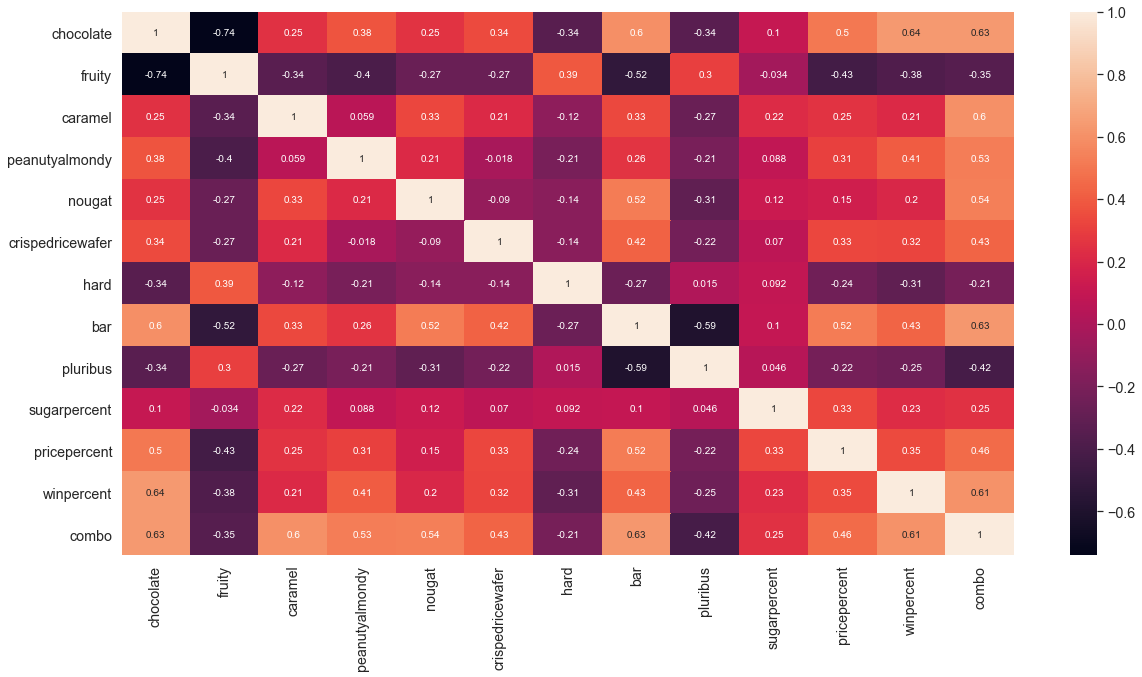

In [128]:
plt.figure(figsize=(20,10))
sns.heatmap(candy_df.corr(),annot=True)

### Tabular Form, to see the top co-relations more easily

In [50]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [129]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
display_all(corrank(candy_df))

,Feature1,Feature2,corr
0,chocolate,winpercent,0.64
1,chocolate,combo,0.63
2,bar,combo,0.63
3,winpercent,combo,0.61
4,caramel,combo,0.60
5,chocolate,bar,0.60
6,nougat,combo,0.54
7,peanutyalmondy,combo,0.53
8,nougat,bar,0.52
9,bar,pricepercent,0.52


<span style='background:yellow'>  Observation: 
    Also Chocolate is highly co-related to winpercent. 
    Chocolates & Bar are co-related. 
    When we go to Bar, multiple bars are preferred (pluribus)</span>

# Machine Learning (Model Building)

## Importing Libraries 

In [113]:

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


In [53]:
#Since we installed tabulate thru pip install. Now will re-running the notebook, we dont want to install again
#so commenting out the pip statement
#pip install tabulate

In [54]:
from tabulate import tabulate

## Checking the Multicollinearity 

**If Multicollinearity is present it becomes difficult to find out which variable is actually contributing to predict the response variable **

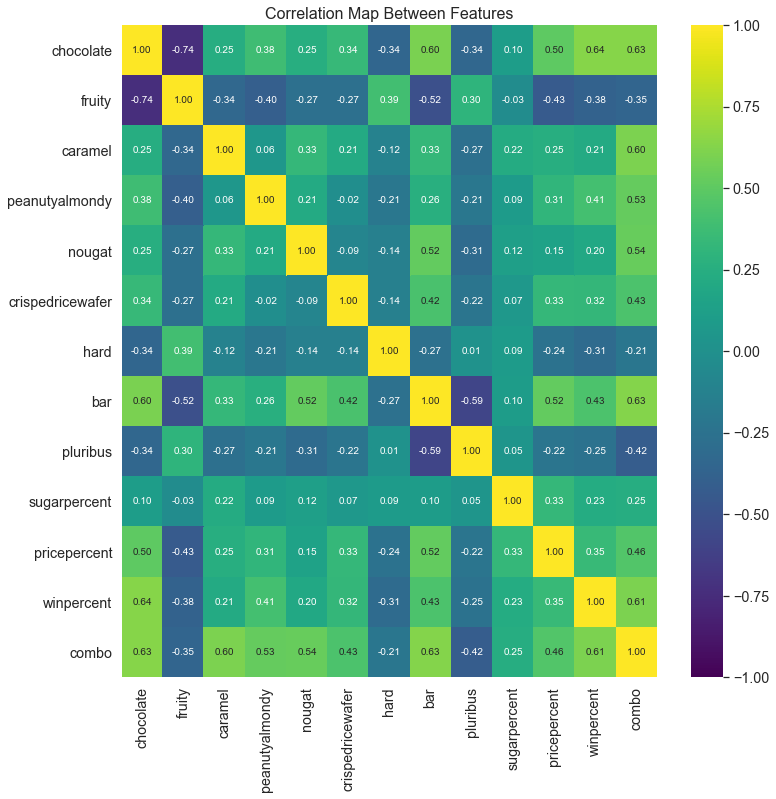

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(candy_df.corr(), annot=True, fmt="0.2f", cmap="viridis", vmin=-1.0, vmax=1.0)
plt.title('Correlation Map Between Features', fontsize=16)
plt.show()

<span style='background:Orange'>  Observation:There is no significant co-relation between the features. Hence we can rule out multicollinearity </span>

## Target Variable - Normally Distributed ?

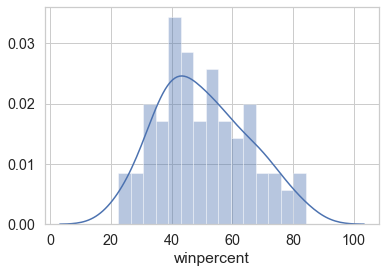

In [56]:
sns.distplot(candy_df['winpercent'],bins=15)

<span style='color:Blue'> Observation: Winpercent (target variable) is normally distributed, so we can proceed with the model building </span>

## Relationship between Features and Label

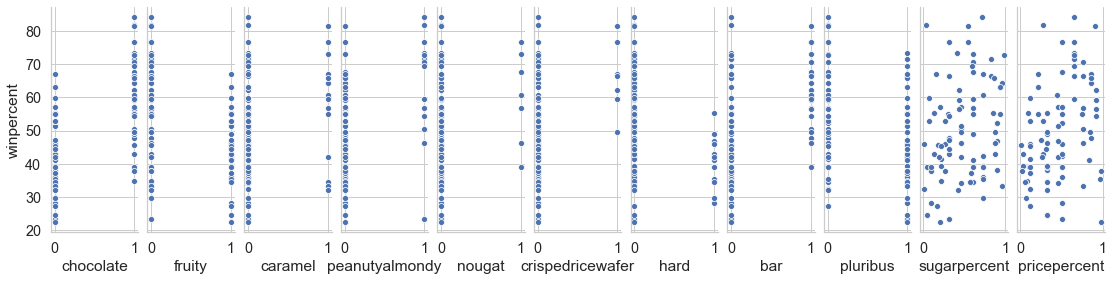

In [57]:
pairplot = sns.pairplot(data=candy_df,x_vars=['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat','crispedricewafer', 'hard',
                                   'bar', 'pluribus', 'sugarpercent','pricepercent'],y_vars=['winpercent'],height=3)
pairplot.fig.set_size_inches(15,4)

In [114]:
candy_df[['sugarpercent','pricepercent']].describe()

,sugarpercent,pricepercent
count,85.00,85.00
mean,0.48,0.47
std,0.28,0.29
min,0.01,0.01
25%,0.22,0.26
50%,0.47,0.47
75%,0.73,0.65
max,0.99,0.98


<span style='color:Blue'> Observation: All features have value between 0 and 1 as seen in the graph and double checked using .describe() for the sugarprecent and pricepercent. So we need not standardize the data</span>

## Train & Test Data

<span style='color:Blue'>   We create a list of the Features and Target Variable (Winpercent) </span>
                

In [59]:

features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']        
target = ['winpercent']

In [60]:
candy_df[features]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.73,0.86
1,1,0,0,0,1,0,0,1,0,0.60,0.51
2,0,0,0,0,0,0,0,0,0,0.01,0.12
3,0,0,0,0,0,0,0,0,0,0.01,0.51
4,0,1,0,0,0,0,0,0,0,0.91,0.51
5,1,0,0,1,0,0,0,1,0,0.47,0.77
6,1,0,1,1,1,0,0,1,0,0.60,0.77
7,0,0,0,1,0,0,0,0,1,0.31,0.51
8,0,0,0,0,0,0,0,0,1,0.91,0.32
9,0,1,1,0,0,0,0,0,0,0.60,0.32


In [61]:
candy_df[target]

,winpercent
0,66.97
1,67.60
2,32.26
3,46.12
4,52.34
5,50.35
6,56.91
7,23.42
8,38.01
9,34.52


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(candy_df[features], candy_df[target], test_size=0.2, random_state=0)

In [63]:
print('Train cases as below')
print('X_train shape : ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('***************************')
print('Test cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape :  (68, 11)
y_train shape:  (68, 1)
***************************
Test cases as below
X_test shape:  (17, 11)
y_test shape:  (17, 1)


In [64]:
X_train.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
54,1,0,0,1,0,0,0,0,0,0.99,0.65
62,1,0,0,0,0,0,0,0,1,0.27,0.98
74,1,1,0,0,0,0,1,0,0,0.60,0.32
22,1,0,0,0,0,0,0,0,1,0.13,0.09
6,1,0,1,1,1,0,0,1,0,0.60,0.77


In [65]:
y_train.head()

,winpercent
54,72.89
62,37.89
74,48.98
22,55.38
6,56.91


In [66]:
X_test.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
2,0,0,0,0,0,0,0,0,0,0.01,0.12
13,0,1,0,0,0,0,0,0,1,0.73,0.51
63,0,1,0,0,0,0,1,0,1,0.27,0.12
41,0,1,0,0,0,0,1,0,1,0.85,0.32
48,0,0,0,0,0,0,0,0,1,0.09,0.02


In [67]:
y_test.head()

,winpercent
2,32.26
13,42.27
63,46.00
41,55.35
48,37.72


## Model Building

### Linear Regression

In [68]:
model_lr = LinearRegression(fit_intercept=True)

In [69]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)

### Decision Tree

In [71]:
model_dt = tree.DecisionTreeRegressor(random_state=0)

In [72]:
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [73]:
y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)

#### Decision Tree- with Manual Tuning

In [74]:
model_dt_manual_tune = tree.DecisionTreeRegressor(random_state=0,max_depth=5,max_features='log2',criterion='friedman_mse')

In [75]:
model_dt_manual_tune.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='log2', random_state=0)

In [76]:
y_pred_train_dt_manual_tune = model_dt_manual_tune.predict(X_train)
y_pred_test_dt_manual_tune = model_dt_manual_tune.predict(X_test)

#### Decision Tree- with Grid Search

In [77]:
model_dt_grid_search = tree.DecisionTreeRegressor(random_state=0)
tree_para = [{'max_depth': range(2,60),'max_features': ['sqrt', None] }]

In [78]:
grid_search = GridSearchCV(model_dt_grid_search,tree_para, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': range(2, 60),
                          'max_features': ['sqrt', None]}])

In [79]:
y_pred_train_dt_grid_search = grid_search.best_estimator_.predict(X_train)
y_pred_test_dt_grid_search = grid_search.best_estimator_.predict(X_test)

### Random Forest

In [80]:
model_rf = RandomForestRegressor(random_state=0)

In [81]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [82]:
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

#### Random Forest- With Manual Tuning

In [83]:
model_rf_manual_tune = RandomForestRegressor(random_state=0,n_estimators=100,max_features='log2',min_samples_split=2,
                                              min_samples_leaf=1)

In [84]:
model_rf_manual_tune.fit(X_train,y_train)

RandomForestRegressor(max_features='log2', random_state=0)

In [85]:
y_pred_train_rf_manual_tune = model_rf_manual_tune.predict(X_train)
y_pred_test_rf_manual_tune = model_rf_manual_tune.predict(X_test)

#### Random Forest with Randomized Search

In [86]:
model_rf_randomized_search = RandomForestRegressor(random_state=0)

In [87]:
param_dist = {"max_depth": range(2,8),
              "min_samples_split": sp_randint(2, 15),
              "min_samples_leaf": sp_randint(1, 15),
              "bootstrap": [True, False],
              "n_estimators": [100, 200, 400],
              'max_features': ['sqrt', None]
             }
n_iter_search = 15
random_search = RandomizedSearchCV(model_rf_randomized_search,param_distributions=param_dist,n_iter=n_iter_search,n_jobs=-1,cv=5)

In [88]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 8),
                                        'max_features': ['sqrt', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016A2B9129D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016A2B912CA0>,
                                        'n_estimators': [100, 200, 400]})

In [89]:
y_pred_train_rf_randomized_search = random_search.predict(X_train)
y_pred_test_rf_randomized_search = random_search.predict(X_test)

### Model Evaluation

In [90]:
def GetModelMetrics(strModelName,y,y_pred):
    mae = metrics.mean_absolute_error(y,y_pred)
    mse = metrics.mean_squared_error(y,y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y,y_pred))
    r2 = metrics.r2_score(y,y_pred)
    return pd.DataFrame({'mae':mae,'mse':mse,'rmse':rmse,'r2':r2},
                       index=['Model: '+ strModelName])

#### Train & Test Set Values

In [91]:
print('\n------------------------------------Train Set Statistics------------------------------------\n')
print(tabulate(pd.concat([GetModelMetrics('LR',y_train,y_pred_train_lr),
          GetModelMetrics('DT',y_train,y_pred_train_dt),
          GetModelMetrics('DT - Manually Tuned',y_train,y_pred_train_dt_manual_tune),
          GetModelMetrics('DT - Tuning by Grid Search',y_train,y_pred_train_dt_grid_search),
          GetModelMetrics('RF',y_train,y_pred_train_rf),
          GetModelMetrics('RF - Manually Tuned',y_train,y_pred_train_rf_manual_tune),
          GetModelMetrics('RF - Tuning by Random Search',y_train,y_pred_train_rf_randomized_search)],
          axis=0),showindex=True,headers=['mae','mse','rmse','r2']))

print('\n\n\n------------------------------------Test Set Statistics------------------------------------\n')
print(tabulate(pd.concat([GetModelMetrics('LR',y_test,y_pred_test_lr),
          GetModelMetrics('DT',y_test,y_pred_test_dt),
          GetModelMetrics('DT - Manually Tuned',y_test,y_pred_test_dt_manual_tune),
          GetModelMetrics('DT - Tuning by Grid Search',y_test,y_pred_test_dt_grid_search),
          GetModelMetrics('RF',y_test,y_pred_test_rf),
          GetModelMetrics('RF - Manually Tuned',y_test,y_pred_test_rf_manual_tune),
          GetModelMetrics('RF - Tuning by Random Search',y_test,y_pred_test_rf_randomized_search)],
          axis=0),showindex=True,headers=['mae','mse','rmse','r2']))


------------------------------------Train Set Statistics------------------------------------

                                          mae        mse      rmse        r2
-----------------------------------  --------  ---------  --------  --------
Model: LR                            8.25746   103.007    10.1492   0.522872
Model: DT                            0.821457    8.18447   2.86085  0.962089
Model: DT - Manually Tuned           6.20118    81.2591    9.01438  0.623607
Model: DT - Tuning by Grid Search    9.20582   131.071    11.4486   0.392875
Model: RF                            4.11767    29.1887    5.40266  0.864797
Model: RF - Manually Tuned           3.77078    25.304     5.03031  0.882791
Model: RF - Tuning by Random Search  7.09972    79.007     8.88859  0.634039



------------------------------------Test Set Statistics------------------------------------

                                          mae       mse      rmse          r2
-----------------------------------  -

<span style='color:Blue'> Observation: 1. MSE is calcuated to do RMSE. So we need not compare the MSE data .  R2 is also not used: Conclusion:  Only rmse or mae is used as they are in comparable units with the y-variable </span>
 
<span style='color:Blue'> Observation 2: There are issue of overfitting with Decision Tree and Randomforest. Tuning has reduced the Overfitting                  
Note: Overfitting is identified  when  Lower rmse on train and relatively very high rmse on test - is overfitting.                     
Underfitting : is when Training data is higher than Test - is underfitting </span>



#### Final Steps- Percentage Error Across Models

<span style='color:Blue'> 

1. Compare models on test error
    
    We divide by target variable to get percentage error . It is to get an idea of how big the error is in terms of percentage. So we can try rmse/y-variable-mean or may be median..
    
So by only seeing the table above, we cannot comment on the absolute values ..
we  can compare if model 1 is better than model 2 .. but can't say how good is the model 1 or model 2 standalone
Thumb rule for is lower the rmse , better it is
    
You can just use rmse to compare models and arrive at best model. R2 is not that important.
Or use Mae as well..
    
2. Also check overfitting.

3. Final Choice would be a balance between the two points

</span>

In [121]:
average_winpercent=candy_df['winpercent'].mean()
average_winpercent

50.316763811764716

In [124]:
def GetPercentageErrorMetrics(strModelName,y,y_pred):
    mae = ((metrics.mean_absolute_error(y,y_pred))/average_winpercent)*100
    rmse = ((np.sqrt(metrics.mean_squared_error(y,y_pred)))/average_winpercent)*100
    return pd.DataFrame({'mae':mae,'rmse':rmse},
                       index=['Model: '+ strModelName])
                         


In [126]:
print('\n------------------------------------Train Set Error Percentage------------------------------------\n')
print(tabulate(pd.concat([GetPercentageErrorMetrics('LR',y_train,y_pred_train_lr),
          GetPercentageErrorMetrics('DT',y_train,y_pred_train_dt),
          GetPercentageErrorMetrics('DT - Manually Tuned',y_train,y_pred_train_dt_manual_tune),
          GetPercentageErrorMetrics('DT - Tuning by Grid Search',y_train,y_pred_train_dt_grid_search),
          GetPercentageErrorMetrics('RF',y_train,y_pred_train_rf),
          GetPercentageErrorMetrics('RF - Manually Tuned',y_train,y_pred_train_rf_manual_tune),
          GetPercentageErrorMetrics('RF - Tuning by Random Search',y_train,y_pred_train_rf_randomized_search)],
          axis=0),showindex=True,headers=['mae','rmse']))

print('\n\n\n------------------------------------Test Set Error Percentage------------------------------------\n')
print(tabulate(pd.concat([GetPercentageErrorMetrics('LR',y_test,y_pred_test_lr),
          GetPercentageErrorMetrics('DT',y_test,y_pred_test_dt),
          GetPercentageErrorMetrics('DT - Manually Tuned',y_test,y_pred_test_dt_manual_tune),
          GetPercentageErrorMetrics('DT - Tuning by Grid Search',y_test,y_pred_test_dt_grid_search),
          GetPercentageErrorMetrics('RF',y_test,y_pred_test_rf),
          GetPercentageErrorMetrics('RF - Manually Tuned',y_test,y_pred_test_rf_manual_tune),
          GetPercentageErrorMetrics('RF - Tuning by Random Search',y_test,y_pred_test_rf_randomized_search)],
          axis=0),showindex=True,headers=['mae','rmse']))


------------------------------------Train Set Error Percentage------------------------------------

                                          mae      rmse
-----------------------------------  --------  --------
Model: LR                            16.4109   20.1706
Model: DT                             1.63257   5.68568
Model: DT - Manually Tuned           12.3243   17.9153
Model: DT - Tuning by Grid Search    18.2957   22.7531
Model: RF                             8.18349  10.7373
Model: RF - Manually Tuned            7.49409   9.99728
Model: RF - Tuning by Random Search  14.1101   17.6653



------------------------------------Test Set Error Percentage------------------------------------

                                         mae     rmse
-----------------------------------  -------  -------
Model: LR                            14.6961  19.1528
Model: DT                            20.1509  25.7899
Model: DT - Manually Tuned           15.1966  18.2875
Model: DT - Tuning by Grid S

#### Model Evaluation Observation 

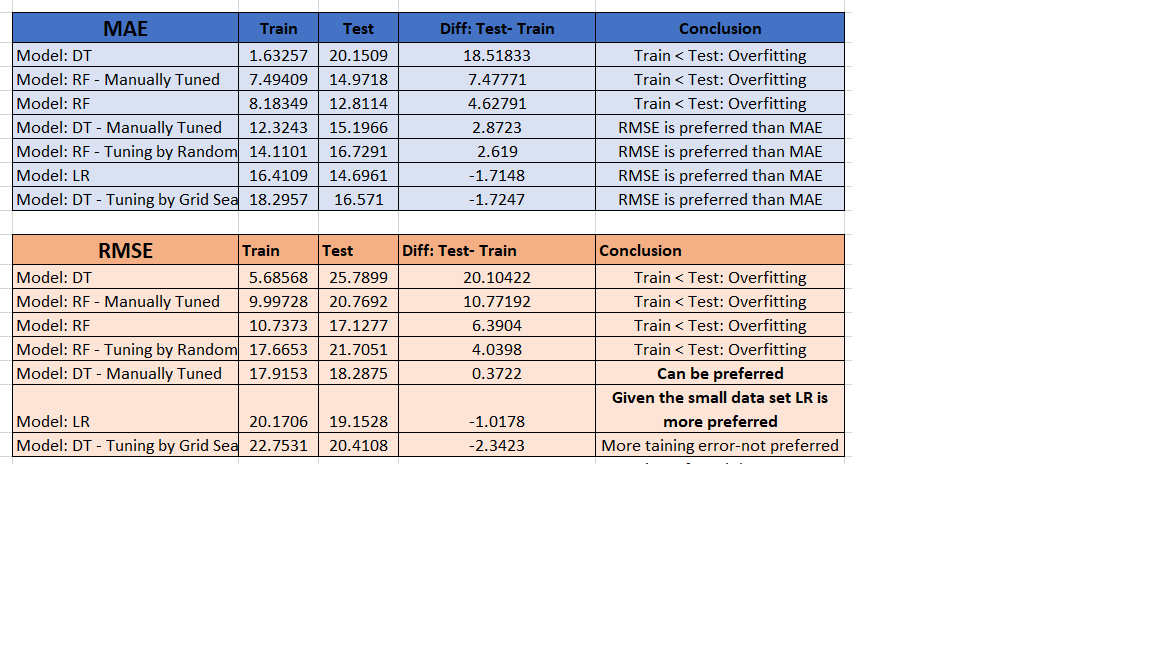

<span style='color:Blue'> 1. Lets eliminate the Overfitting models (7 models)</span>

<span style='color:Blue'> 2. RMSE is the preferred metric than MAE(MAE if outlier are removed or not important. RMSE when outerliers are important )</span>

<span style='color:Blue'> 3. Higher Test Score is preferred </span>

<span style='color:Blue'> 4. Random Forest is preferred over Decision Tree</span>

<span style='color:Blue'> 5. **Linear Regression** is preferred, as it is a High Bias Algorithim (Changes in data doesnt change the dataset a lot. Also for small data set Linear regression is preferred over Decision Tree/Random Forest (</span>

## Recommendations

<span style='color:Blue'>Since we found that Linear Regression model is the best, lets define its equation</span>

In [127]:
from sklearn import linear_model

In [109]:
candy_df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent', 'type', 'combo'],
      dtype='object')

In [110]:
final = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus','sugarpercent','pricepercent']
X = candy_df[final]
y = candy_df['winpercent']
reg = linear_model.LinearRegression()
reg.fit(X, y)
inter = reg.intercept_
coefs = reg.coef_
score = reg.score(X, y)
score

0.5402088191987462

### Recommended Equation

In [111]:
equation = 'winpercent ='
for feature, coef in zip(features, coefs):
    if coef >= 0:
        equation += ' + '
    else:
        equation += ' - '
        coef *= -1
    equation += f'{round(coef, 3)} * {feature}'
if inter >= 0:
    equation += f' + {round(inter, 3)}'
else:
    inter *= -1
    equation += f' - {round(inter, 3)}'
equation

'winpercent = + 19.748 * chocolate + 9.422 * fruity + 2.224 * caramel + 10.071 * peanutyalmondy + 0.804 * nougat + 8.919 * crispedricewafer - 6.165 * hard + 0.442 * bar - 0.854 * pluribus + 9.087 * sugarpercent - 5.928 * pricepercent + 34.534'

<span style='color:Blue'> To sort the coefficients to see which has the most and the least impact</span>

In [112]:
df_weights = pd.DataFrame({'feature': final, 'weight': coefs})
df_weights.sort_values(by=['weight'], ascending=False, inplace=True)
df_weights

,feature,weight
0,chocolate,19.75
3,peanutyalmondy,10.07
1,fruity,9.42
9,sugarpercent,9.09
5,crispedricewafer,8.92
2,caramel,2.22
4,nougat,0.80
7,bar,0.44
8,pluribus,-0.85
10,pricepercent,-5.93


# Conclusion